<h2 align="center">Paweł Kocimski </h2>
<h3 align="center">Metody Obliczeniowe w Nauce i Technice </h3>
<h4 align="center">Lab 9 Faktoryzacja QR</h4>



<h5>Faktoryzacja QR metodą Grama-Schmidta</h5>
1.Napisz funkcję dokonującą faktoryzacji QR macierzy $A ∈ {R}^{n×n} , A = [{a}_{1} , {a}_{2} , . . . , {a}_{n} ]$
(a i to kolejne kolumny macierzy A) klasyczną metodą ortogonalizacji Grama-
Schmidta:

a) Stworzenie funkcji generującej losową macierz o zadanym rozmiarze

In [2]:
import numpy as np

def return_and_print_matrix(size):
    with np.printoptions(precision=4, suppress=True, formatter={'float': '{:0.4f}'.format}, linewidth=100):
        A = np.random.randn(size, size) * 10
        
        return A

return_and_print_matrix(4)

array([[ -7.01087377, -19.52187063,  -9.13992122,   6.08021599],
       [ -7.43634726, -26.12019687,  -4.41896538,   1.64051677],
       [  8.55314824,   4.98765421,   6.99335577,  12.62982587],
       [  0.82425175,   7.4151844 , -12.46394994,   3.56236461]])

b) Implementacja funkcji faktoryzacji QR metodą Grama-Schmidta

In [3]:
def qr_factorization(A):
    with np.printoptions(precision=4, suppress=True, formatter={'float': '{:0.4f}'.format}, linewidth=100):
        A_copy = np.copy(A)

        Q = np.zeros((A_copy.shape[0], A_copy.shape[0]))
        R = np.zeros((A_copy.shape[0], A_copy.shape[0]))
        
        #gnenerate Q
        #u0
        Q[:, 0] = np.divide(A_copy[:, 0], np.linalg.norm(A_copy[:,0])) #normalize
        #u1->un
        for k in range(1, A_copy.shape[0]):
            uk = np.copy(A_copy[:,k])
            for i in range(k):
                uk -= np.dot(Q[:, i], A_copy[:, k]) * Q[:, i] 
                
            
            uk = np.divide(uk, np.linalg.norm(uk)) #normalize
            
            Q[:,k] = uk
        
        #generate R
        for i in range(0, A_copy.shape[0]):
            for j in range(i, A_copy.shape[0]):
                R[i][j] = np.dot(Q[:,i], A_copy[:,j])
                
    return Q, R

2. Przetestuj zaimplementowaną metodę porównując wyniki uzyskane z jej pomocą
z wynikami zwracanymi przez funkcję biblioteczną. W testach wykorzystaj 4-5
macierzy losowych o różnym rozmiarze.

a) Prosta funkcja testującą dla małej macierzy 

In [4]:
def qr_test_simple():
    with np.printoptions(precision=4, suppress=True, formatter={'float': '{:0.4f}'.format}, linewidth=100):
       
        A = return_and_print_matrix(3) 
        print("A");print(A);print()
        
        q, r = np.linalg.qr(A)
        print("LIBRARY function")
        print("Q");print(q);print()
        print("R");print(r);print()
        
        Q, R = qr_factorization(A)
        print("USER function") 
        print("Q");print(Q);print()
        print("R");print(R);print()
        print("A after multiplication user Q and R");print(np.dot(Q, R))
        print()   
              
qr_test_simple()

A
[[17.4460 0.0120 -7.7853]
 [6.4859 5.9946 -3.1455]
 [10.6587 9.1885 -14.8595]]

LIBRARY function
Q
[[-0.8134 0.5813 -0.0225]
 [-0.3024 -0.4555 -0.8373]
 [-0.4969 -0.6743 0.5463]]

R
[[-21.4485 -6.3886 14.6680]
 [0.0000 -8.9190 6.9265]
 [0.0000 0.0000 -5.3089]]

USER function
Q
[[0.8134 -0.5813 0.0225]
 [0.3024 0.4555 0.8373]
 [0.4969 0.6743 -0.5463]]

R
[[21.4485 6.3886 -14.6680]
 [0.0000 8.9190 -6.9265]
 [0.0000 0.0000 5.3089]]

A after multiplication user Q and R
[[17.4460 0.0120 -7.7853]
 [6.4859 5.9946 -3.1455]
 [10.6587 9.1885 -14.8595]]



<h6>Wnioski</h6>
Macierze (q, r) generowane przez funkcję biblioteczną mogą się różnić znakiem Liczb w tych samych wierszach w stosunku do macierzy (Q, R) generowanych przez funkcję użytkownika. Po przemnożeniu tych macierzy(Q, R) otrzymujemy macierz co dowodzi porpawności algorytmu.   

In [5]:
def qr_test_advanced():
    sizes = [5, 18, 26, 45, 109, 163]
    for size in sizes:
        A = return_and_print_matrix(size) 
        q, r = np.linalg.qr(A)
        Q, R = qr_factorization(A)
        A_after_multiplication = np.dot(Q,R)
        for i in range(A.shape[0]):
            for j in range(A.shape[0]):
                if(not(np.isclose(abs(q[i][j]), abs(Q[i][j])) and np.isclose(abs(r[i][j]), abs(R[i][j]))
                      and np.isclose(abs(A[i][j]), abs(A_after_multiplication[i][j])))):
                   print("Tests  FAILED")
                   return
    print("Tests SUCCESS")

qr_test_advanced()            
               
        

Tests SUCCESS


<h6>Wnioski</h6>
Algorytm działa poprawnie

3. Wygeneruj 30-50 przykładowych macierzy 8 × 8 o różnym wskaźniku uwarunko-wania $cond({A}_{i})$ (stosunek największej do najmniejszej wartości osobliwej). Wykorzystaj w tym celu SVD oraz biblioteczną funkcję realizującą dekompozycję QR(potrzebne będą dwie losowe macierze ortogonalne oraz diagonalna macierz odpowiednio szybko malejących wartości osobliwych).

In [32]:
from scipy.stats import ortho_group

def qr_test_diff_proportion_cond():
    with np.printoptions(precision=4, suppress=True, formatter={'float': '{:0.2e}'.format}, linewidth=200):
        matrices_to_tests = []
        
        helper_multiplier_max_val=1
        for i in range(1, 41,):
            helper_multiplier_max_val *= 1.2
            min_val = 50
            max_val = 100 * helper_multiplier_max_val
            
            U = ortho_group.rvs(8) *  (min_val + max_val) / 2
            V = ortho_group.rvs(8) * (min_val + max_val) / 2
            flatted = np.random.randint(50,100 * i, size=(8))
            
            cond_do_while = True
            while cond_do_while:
                max_min_index = np.random.randint(0,8, size=(2))
                cond_do_while = max_min_index[0] == max_min_index[1]
            
            flatted[max_min_index[0]] = max_val
            flatted[max_min_index[1]] = min_val
            flatted.sort()
            flatted = flatted[::-1]
            
            S = np.diagflat(flatted)
            print("Diagonal matrix")
            print(S); print()
            
            matrix = np.dot(np.dot(U,S), np.transpose(V))
            print("Genereated matrix")
            print(matrix); print()
            
            matrices_to_tests.append(matrix)
    return matrices_to_tests
        
        
    
qr_test_diff_proportion_cond()

Diagonal matrix
[[120   0   0   0   0   0   0   0]
 [  0  94   0   0   0   0   0   0]
 [  0   0  93   0   0   0   0   0]
 [  0   0   0  83   0   0   0   0]
 [  0   0   0   0  81   0   0   0]
 [  0   0   0   0   0  81   0   0]
 [  0   0   0   0   0   0  61   0]
 [  0   0   0   0   0   0   0  50]]

Genereated matrix
[[-2.29e+05 3.10e+05 1.30e+05 2.39e+05 1.10e+05 -1.17e+05 4.30e+04 3.81e+05]
 [-9.08e+04 -1.56e+05 2.28e+05 -4.46e+04 -2.71e+05 -2.96e+05 3.40e+05 -6.66e+04]
 [1.16e+05 -2.68e+05 3.15e+04 -2.10e+05 -3.24e+05 4.60e+04 -2.24e+05 2.83e+05]
 [-2.18e+05 1.91e+05 2.29e+05 -1.91e+05 -1.66e+05 1.43e+05 -2.19e+05 -6.21e+04]
 [1.31e+05 -2.42e+05 1.36e+05 -2.64e+05 2.99e+05 1.79e+05 2.51e+05 2.98e+05]
 [1.98e+05 2.50e+05 5.13e+04 3.47e+05 -3.21e+05 2.94e+05 1.11e+05 3.21e+04]
 [-2.09e+05 2.72e+05 -4.80e+05 -1.06e+05 -1.50e+05 -2.47e+03 7.05e+04 1.69e+05]
 [-3.14e+05 -2.06e+05 -2.79e+05 2.55e+05 -1.37e+05 2.12e+05 8.53e+03 4.53e+04]]

Diagonal matrix
[[196   0   0   0   0   0   0   0]
 [

[array([[-228847.0210629 ,  309763.83252998,  130029.42616696,
          238898.09746635,  109944.63716327, -117262.08468537,
           42992.95493717,  380573.13687615],
        [ -90776.59978227, -155575.48536577,  227598.88437874,
          -44572.59758519, -270869.95324692, -296239.03325379,
          340131.7518863 ,  -66558.48761081],
        [ 115911.69654319, -268010.68053566,   31504.21527334,
         -210488.7169652 , -324213.84923421,   45964.84805035,
         -224130.0949565 ,  283337.63484727],
        [-218141.50478423,  190661.06800751,  229059.23984319,
         -191110.32218566, -166323.1850455 ,  143287.26120736,
         -218744.99163507,  -62130.7383554 ],
        [ 130879.91973497, -241697.10809075,  136069.27994535,
         -263805.6266543 ,  298985.77280083,  179289.75258314,
          251192.58120009,  298447.39946627],
        [ 197506.51360237,  250218.07164368,   51323.75214212,
          346643.36105724, -321422.78852095,  293800.00480307,
          1106

<h6>Wnioski</h6>
Algorytm poprawnie generuje macierz z wartościami osobliwymi o rosnącym stosunku wartości najmniejszej do najwiekszej. Stosunek ten wynosi $2*{1.2}^{1},2*{1.2}^{2},2*{1.2}^{3},2*{1.2}^{4},..,2*{1.2}^{40}$

4.Dla każdej z uzyskanych w ten sposób macierzy ${A}_{i}$ wyznacz faktoryzację $QR$ korzystając z zaimplementowanej funkcji (${A}_{i} = {Q}_{i}* {R}_{i} $). Przedstaw zależność ||$I−{Q}^{T}_{i}{Q}_{i}$|| od  $cond({A}_{i})$.

Diagonal matrix
[[120   0   0   0   0   0   0   0]
 [  0  82   0   0   0   0   0   0]
 [  0   0  80   0   0   0   0   0]
 [  0   0   0  75   0   0   0   0]
 [  0   0   0   0  70   0   0   0]
 [  0   0   0   0   0  62   0   0]
 [  0   0   0   0   0   0  54   0]
 [  0   0   0   0   0   0   0  50]]

Genereated matrix
[[-9.61e+04 4.58e+04 2.38e+05 6.37e+04 2.55e+05 -2.86e+05 1.06e+05 1.62e+05]
 [-2.53e+05 -2.67e+05 4.04e+04 -3.41e+05 -3.18e+05 5.30e+03 1.67e+05 -2.15e+05]
 [-9.96e+04 4.30e+04 1.80e+05 -2.43e+05 8.51e+04 -4.51e+04 -2.94e+05 2.09e+05]
 [-1.42e+05 1.57e+05 3.19e+05 2.24e+05 2.84e+05 2.22e+05 -1.17e+04 -1.20e+05]
 [-2.02e+05 8.22e+04 -8.88e+04 1.39e+05 -5.72e+03 1.34e+05 1.16e+05 2.48e+05]
 [2.81e+05 -2.81e+04 -7.13e+04 -3.99e+05 1.02e+05 1.38e+05 3.82e+05 -1.31e+04]
 [-1.42e+05 3.37e+05 -1.74e+05 -1.97e+05 7.81e+04 -1.95e+05 -2.81e+04 -2.16e+05]
 [1.53e+05 3.33e+05 3.03e+05 5.90e+04 -2.39e+05 -7.05e+04 -6.43e+04 1.51e+05]]

Diagonal matrix
[[179   0   0   0   0   0   0   0]
 

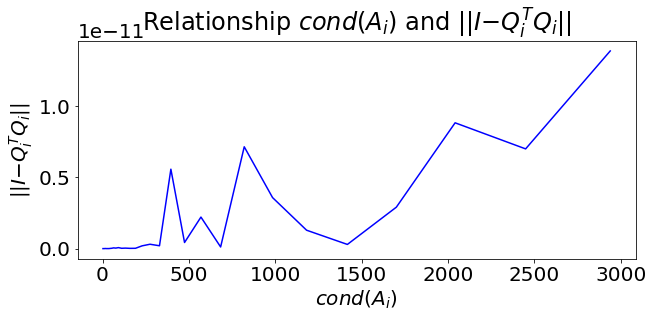

In [70]:
import matplotlib.pyplot as plt

def cond_A_relationship():
    with np.printoptions(precision=4, suppress=True, formatter={'float': '{:0.2e}'.format}, linewidth=200):
        matrices = qr_test_diff_proportion_cond()
         
        cond_matrices = np.zeros(40)
        helper_multiplier_max_val=1
        for i in range(1, 41):
            helper_multiplier_max_val *= 1.2
            cond_matrices[i-1] = 2 * helper_multiplier_max_val
            
        matrix_norms = np.zeros(40)

        for index, matrix in enumerate(matrices):
            I = np.ones(64).reshape((8,8))
            I = np.diag(np.diag(I))

            Q, R = qr_factorization(matrix)
            QT = np.transpose(Q)
            I_QTQ = np.subtract(I,np.dot(Q,QT))
            
            matrix_norm = 0;
            for i in range(8): 
                if np.sum(np.absolute(I_QTQ[:,i])) > matrix_norm:
                    matrix_norm  = np.sum(np.absolute(I_QTQ[:,i]))
            
            matrix_norms[index] = matrix_norm
            
        plt.rcParams.update({'font.size':20})
        fig, ax = plt.subplots(figsize=(10, 4))
        ax.set(title='Relationship $cond({A}_{i})$ and ||$I−{Q}^{T}_{i}{Q}_{i}$||',
        xlabel='$cond({A}_{i})$', ylabel='||$I−{Q}^{T}_{i}{Q}_{i}$||')
       
        
        plt.plot(cond_matrices, matrix_norms, 'b', markersize=1)
        plt.show()

    
    
cond_A_relationship()


5. Zinterpretuj wyniki. Jaka jest przyczyna uzyskanych rozbieżności? Od czego zależy wielkość rozbieżności?

<h6> Wnioski </h6>
Wraz ze wzosetem $cond({A}_{i})$ rośnie ||$I−{Q}^{T}_{i}{Q}_{i}$||<br>
Może być to spowodowane operacjami na liczbach zmiennoprzecinkowych

<h5>Rozwiązywanie układów równań metodą QR</h5>

Bezpośrednie rozwiązywanie układu równań przy pomocy równań normalnych jest obarczone dużym błędem jeśli macierz A jest źle uwarunkowana (jej współczynnik uwarunkowania jest wysoki). Lepszym sposobem jest wykorzystanie dekompozycji QR w tym celu. Napisz funkcję rozwiązującą nadokreślony układ równań liniowych metodą QR korzystając z własności macierzy ortogonalnych: ${A}^{T} = {A}^{−1}$ , a także z mechanizmu back
substitution. Następnie wykorzystaj ją do rozwiązania problemu aproksymacji średnio-
kwadratowej dla zbioru punktów podanego tabeli poniżej. Przyjmij model postaci:

$$f(x) = {α}_{0} + {α}_{1}x + {α}_{2}{x}^{2}$$

Przedstaw wizualizację uzyskanego wyniku (punkty oraz funkcja aproksymująca f ).


<table style="width:100%; font-size: 15px;">
  <tr>
    <td>x</td>
    <td>-5</td>
    <td>-4</td>
    <td>-3</td>
    <td>-2</td>
    <td>-1</td>
    <td>0</td>
    <td>1</td>
    <td>2</td>
    <td>3</td>
    <td>4</td>
    <td>5</td>
  </tr>
      <tr>
    <td>y</td>
    <td>2</td>
    <td>7</td>
    <td>9</td>
    <td>12</td>
    <td>13</td>
    <td>14</td>
    <td>14</td>
    <td>13</td>
    <td>10</td>
    <td>8</td>
    <td>4</td>
  </tr>
</table>

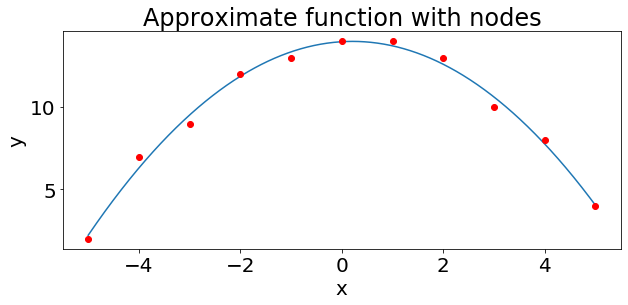

In [113]:
def approximate_f():
    A = [[1, -5, 25],
         [1, -4, 16],
         [1, -3, 9],
         [1, -2, 4],
         [1, -1, 1],
         [1, 0, 0],
         [1, 1, 1],
         [1, 2, 4],
         [1, 3, 9],
         [1, 4, 16],
         [1, 5, 25]]
    B = [2, 7, 9, 12, 13, 14, 14, 13, 10, 8, 4]
    
    Q, R = np.linalg.qr(A) 
    R2 =  np.dot(np.transpose(Q), B)
    
    alphas = np.zeros(3)
    
    for i in range(R.shape[0]-1, -1, -1):
        sum_known = R2[i]
        for j in range(i + 1, R.shape[0]):
            sum_known -= R[i][j] * alphas[j]
        alphas[i] = sum_known / R[i][i]
    
    plt.rcParams.update({'font.size':20})
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.set(title='Approximate function with nodes',
    xlabel='x', ylabel='y')
    
    x = np.arange(-5, 5, 0.01)
    y = alphas[2]*x**2 + alphas[1]*x + alphas[0] 
    plt.plot(x,y)
    
   
    
    plt.plot([i for i in range(-5,6,1)],B, "ro")
    plt.show()
approximate_f()    

<h6> Wnioski </h6>
Faktoryzacja QR może zostać użyta w aproksymacji, pozwala dosć dobrze przybliżyć funkcję<br>
Taka metoda jest stosunkowo wydajna i ma niski spółczynnik uwarunkowania

In [10]:
A = np.array([0, 1, 2, 3, 3, 2, 1,0])

pi2 = np.pi * 2.0

def DFT(fnList):
    with np.printoptions(precision=4, suppress=True, formatter={'float': '{:0.2e}'.format}, linewidth=200):
        N = len(fnList)
        FmList = []
        for m in range(N):
            Fm = 0.0
            for n in range(N):
                Fm += fnList[n] * np.exp(- 1j * pi2 * m * n / N)
            FmList.append(Fm / N)
        return np.array(FmList)
print(DFT(A))

[ 1.50000000e+00+0.00000000e+00j -7.28553391e-01-3.01776695e-01j
  2.77555756e-17+9.58689626e-18j -2.14466094e-02-5.17766953e-02j
  0.00000000e+00+3.06161700e-17j -2.14466094e-02+5.17766953e-02j
 -4.85722573e-16+2.87606888e-17j -7.28553391e-01+3.01776695e-01j]
